# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

In [1]:
import pandas as pd
import numpy as np

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Top Level Questions

** What are the top 5 zipcodes for 911 calls?

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls?

In [95]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

How many unique title codes are there?

In [96]:
df['title'].nunique()

110

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## New features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value.

In [7]:
 sd = df['title'].apply(lambda col : col.split(':')[0])
 sd.to_frame()
 df = pd.merge(df,sd,left_index=True, right_index=True)

In [8]:
df = df.rename(columns={"title_y": "Reason"})

What is the most common Reason for a 911 call based off of this new column?

In [7]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Countplot of 911 calls by Reason.

In [8]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

<AxesSubplot:xlabel='Reason', ylabel='count'>

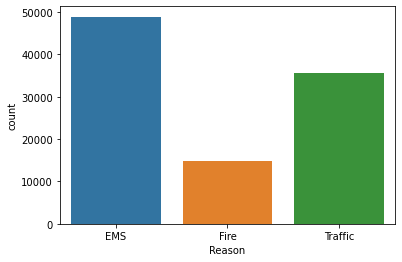

In [9]:
sns.countplot(x = 'Reason', data = df)

In [18]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title_x    99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


In [19]:
df['Hour'] = df['timeStamp'].dt.hour
df['Day'] = df['timeStamp'].dt.weekday
df['Month'] = df['timeStamp'].dt.month

In [23]:
df.head()

,lat,lng,desc,zip,title_x,timeStamp,twp,addr,e,Reason,Hour,Day,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Thu,12


 Dictionary


In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['Day'] = df['Day'].map(dmap)
#df = df.replace({"Day": dmap})


Countplot of the Day of Week column with the hue based off of the Reason column

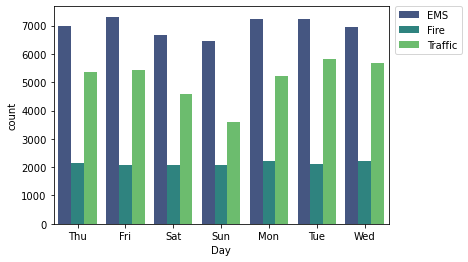

In [25]:
sns.countplot(x = 'Day', hue = 'Reason' , data = df, palette = 'viridis')
#Relocate the legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [18]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8])

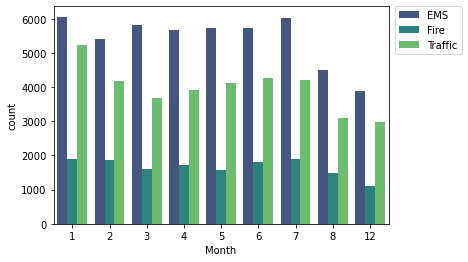

In [27]:
sns.countplot(x = 'Month', hue = 'Reason' , data = df, palette = 'viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

We are missing few months
We want to get an idea of the trend overall

In [33]:
bymonth  = df.groupby('Month').count()
df_2 = df.groupby(['Month','Reason']).count()

In [34]:
bymonth.head()

,lat,lng,desc,zip,title_x,timeStamp,twp,addr,e,Reason,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

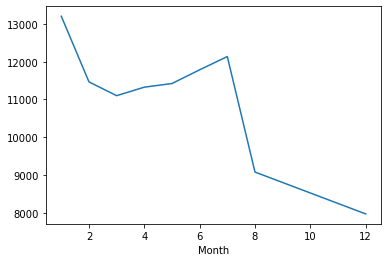

In [35]:
bymonth['lat'].plot()

### Reseting Index to Column

In [36]:
bymonth = bymonth.reset_index()
bymonth.head()

,Month,lat,lng,desc,zip,title_x,timeStamp,twp,addr,e,Reason,Hour,Day
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Let's get by the LM the regression line

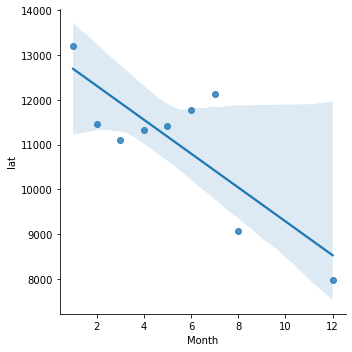

In [38]:
sns.lmplot(x='Month',y='lat',data=bymonth)

Create a new column called 'Date' that contains the date from the timeStamp column.

In [39]:
df['Date'] = df['timeStamp'].apply(lambda col : col.date())
df.head()

,lat,lng,desc,zip,title_x,timeStamp,twp,addr,e,Reason,Hour,Day,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Thu,12,2015-12-10


groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

In [41]:
bydate = df.groupby(df['Date']).count()

In [42]:
bydate.head()

,lat,lng,desc,zip,title_x,timeStamp,twp,addr,e,Reason,Hour,Day,Month
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


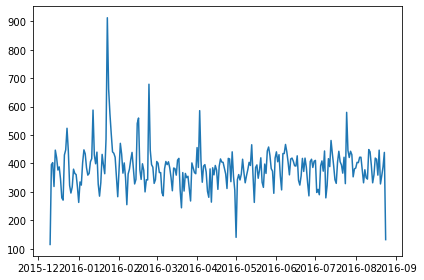

In [45]:
plt.plot(bydate['Reason'])
#Dates are overlapping
plt.tight_layout()

Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

In [68]:
byreason = df.groupby([df['Month'],df['Reason']]).count()

In [69]:
byreason.head()

lat   lng  desc   zip  title_x  timeStamp   twp  addr     e  \
Month Reason                                                                  
1     EMS      6063  6063  6063  5545     6063       6063  6061  6063  6063   
      Fire     1905  1905  1905  1669     1905       1905  1905  1904  1905   
      Traffic  5237  5237  5237  4313     5237       5237  5237  5129  5237   
2     EMS      5413  5413  5413  4890     5413       5413  5412  5413  5413   
      Fire     1869  1869  1869  1632     1869       1869  1868  1868  1869   

               Hour   Day  Date  
Month Reason                     
1     EMS      6063  6063  6063  
      Fire     1905  1905  1905  
      Traffic  5237  5237  5237  
2     EMS      5413  5413  5413  
      Fire     1869  1869  1869

In [70]:
pivot =  byreason.pivot_table(values='desc',index=['Month'],columns=['Reason'], aggfunc = sum, fill_value=0)

In [71]:
pivot

Reason,EMS,Fire,Traffic
Month,,,
1,6063,1905,5237
2,5413,1869,4185
3,5832,1590,3679
4,5680,1717,3929
5,5734,1573,4116
6,5720,1796,4270
7,6029,1901,4207
8,4508,1473,3097
12,3898,1096,2975


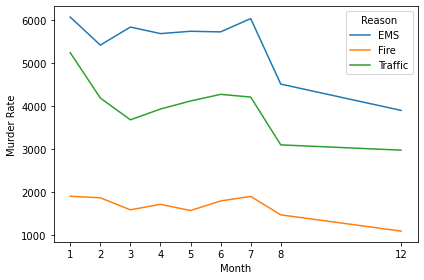

In [72]:
ax = pivot.plot(xticks=pivot.index, ylabel='Murder Rate')
plt.tight_layout()

In [59]:
df.head()

,lat,lng,desc,zip,title_x,timeStamp,twp,addr,e,Reason,Hour,Day,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Thu,12,2015-12-10


Unstack Method to Create Heatmaps

In [73]:
df_day_hour = df.groupby([df['Day'],df['Hour']]).count()['lat']
df_day_hour

Day  Hour
Fri  0       275
     1       235
     2       191
     3       175
     4       201
            ... 
Wed  19      686
     20      668
     21      575
     22      490
     23      335
Name: lat, Length: 168, dtype: int64

In [74]:
df_unstack_hour = df_day_hour.unstack(level = 1)
df_unstack_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day'>

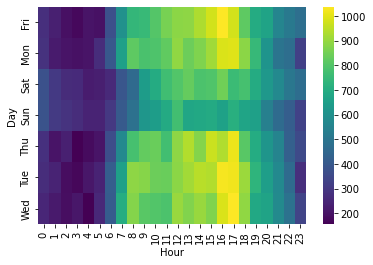

In [80]:
sns.heatmap(df_unstack_hour, cmap='viridis')

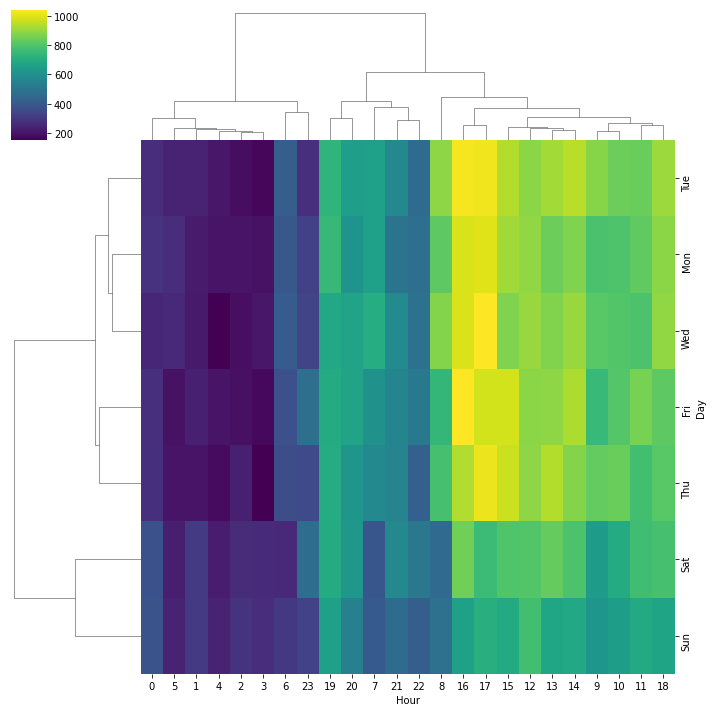

In [81]:
sns.clustermap(df_unstack_hour, cmap='viridis')

Repeat these same plots and operations, for a DataFrame that shows the Month as the column

In [82]:
df_month_hour = df.groupby([df['Month'],df['Hour']]).count()['lat']
df_month_hour

Month  Hour
1      0       294
       1       218
       2       225
       3       205
       4       205
              ... 
12     19      419
       20      361
       21      305
       22      286
       23      204
Name: lat, Length: 216, dtype: int64

In [83]:
df_unstack_month = df_month_hour.unstack(level = 1)
df_unstack_month

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,294,218,225,205,205,214,386,551,755,752,...,775,691,725,871,798,687,592,507,421,345
2,267,194,161,149,161,213,325,550,597,603,...,648,704,692,674,693,578,518,453,426,327
3,214,181,194,149,152,181,291,487,556,614,...,672,707,782,676,600,547,493,402,359,273
4,243,204,170,161,179,178,316,482,613,598,...,705,728,767,728,646,533,472,377,309,282
5,255,195,158,173,160,196,254,439,605,644,...,640,746,728,787,608,510,489,462,405,283
6,229,192,168,157,148,172,290,436,565,630,...,726,767,817,769,693,563,496,456,399,306
7,241,224,181,188,177,196,279,431,545,635,...,791,744,815,826,675,652,583,481,433,292
8,219,182,166,135,131,144,188,326,466,465,...,552,612,656,564,476,419,373,345,245,247
12,150,131,126,118,105,135,184,268,342,373,...,488,455,508,622,573,419,361,305,286,204


<AxesSubplot:xlabel='Hour', ylabel='Month'>

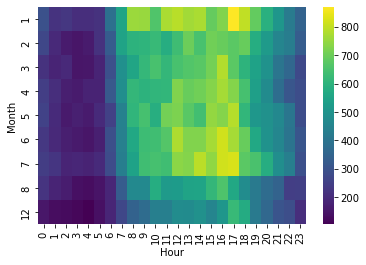

In [85]:
sns.heatmap(df_unstack_month, cmap='viridis')

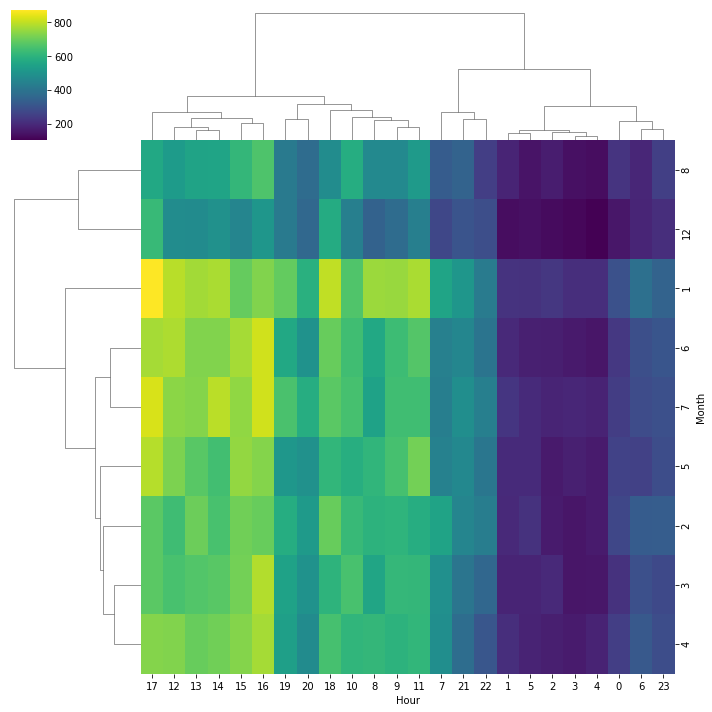

In [86]:
sns.clustermap(df_unstack_month, cmap='viridis')